### Overview ###
The Gala Islands dataset from the faraway package provides ecological data on islands in the Galapagos archipelago. This dataset includes information on various geographic and ecological attributes, making it ideal for exploring relationships between environmental factors and biodiversity.

### Data Context ###
The Galapagos Islands are known for their unique and diverse ecosystems. This dataset captures how factors such as island size, proximity to other islands, and elevation influence the number of species observed. The dataset provides a meaningful context for studying ecological principles, such as island biogeography.

### Variables in the Dataset ###
**Independent Variable (x)**
- Area: The size of the island, measured in square kilometers.
- Role: Larger islands typically support more species due to greater habitat diversity, which makes this variable a logical predictor of species richness.

**Dependent Variable (y)**
- Species: The total number of observed species on the island.
- Role: This variable reflects the biodiversity of each island and serves as the outcome of interest in this analysis.

**Other Variables**
While not used in this specific analysis, the dataset also includes:
- Elevation: The maximum elevation of the island (meters).
- Nearest: Distance to the nearest island (kilometers).
- Scruz: Distance to Santa Cruz Island (kilometers).
- Adjacent: Area of adjacent islands within 50 km (square kilometers).


In [1]:
# ! pip install faraway

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from faraway.datasets import galapagos

In [2]:
# Load the gala dataset
data = galapagos.load()

# Display the first few rows
print(data.head())

# Check dataset attributes
print(data.info())

           Species   Area  Elevation  Nearest  Scruz  Adjacent
Baltra          58  25.09        346      0.6    0.6      1.84
Bartolome       31   1.24        109      0.6   26.3    572.33
Caldwell         3   0.21        114      2.8   58.7      0.78
Champion        25   0.10         46      1.9   47.4      0.18
Coamano          2   0.05         77      1.9    1.9    903.82
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Baltra to Wolf
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    30 non-null     int64  
 1   Area       30 non-null     float64
 2   Elevation  30 non-null     int64  
 3   Nearest    30 non-null     float64
 4   Scruz      30 non-null     float64
 5   Adjacent   30 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.6+ KB
None


In [3]:
# Check data types
print(data.dtypes)

# Ensure no missing values
print(data.isnull().sum())

Species        int64
Area         float64
Elevation      int64
Nearest      float64
Scruz        float64
Adjacent     float64
dtype: object
Species      0
Area         0
Elevation    0
Nearest      0
Scruz        0
Adjacent     0
dtype: int64


In [5]:
# Define variables
X = data[['Area']]  # Independent variable (Area of the island)
y = data['Species']  # Dependent variable (Number of species)

# Check the dimensions
print(f"X shape: {X.shape}")
"""
X should have two dimensions (n, 1) where n is the number of data points.
This is because sklearn's LinearRegression needs a 2D array for the independent variable.
"""
print(f"y shape: {y.shape}") # Y should have one dimension

X shape: (30, 1)
y shape: (30,)


In [6]:
# Add constant term to X
X = sm.add_constant(X)

# Inspect the first few rows of X to verify the constant column was added
print(X.head())

# Check the dimensions of X to ensure an additional column was added
print(f"X shape: {X.shape}")

           const   Area
Baltra       1.0  25.09
Bartolome    1.0   1.24
Caldwell     1.0   0.21
Champion     1.0   0.10
Coamano      1.0   0.05
X shape: (30, 2)


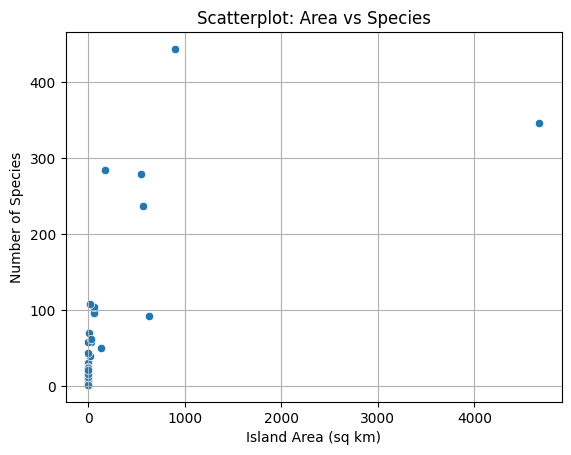

In [7]:
# Create scatterplot
sns.scatterplot(x=data['Area'], y=data['Species'])
plt.title('Scatterplot: Area vs Species')
plt.xlabel('Island Area (sq km)')
plt.ylabel('Number of Species')
plt.grid(True)
plt.show()

In [8]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Get regression coefficients
b0 = model.params['const']  # Intercept
b1 = model.params['Area']  # Slope


# Compute the correlation coefficient
r = np.corrcoef(data['Area'], data['Species'])[0, 1]


# Print the regression line equation and correlation coefficient
print(f"Regression Line: y = {b0:.2f} + {b1:.2f}x")
print(f"Correlation Coefficient (r): {r:.2f}")


# Print the model summary for additional details
print(model.summary())

Regression Line: y = 63.78 + 0.08x
Correlation Coefficient (r): 0.62
                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     17.29
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           0.000275
Time:                        12:48:12   Log-Likelihood:                -177.10
No. Observations:                  30   AIC:                             358.2
Df Residuals:                      28   BIC:                             361.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

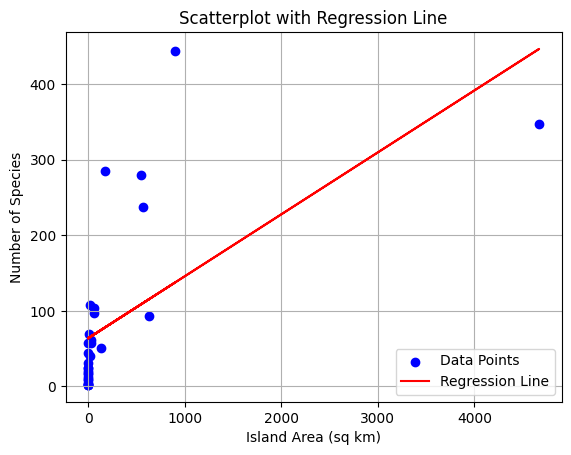

In [9]:
# Generate predicted values
y_pred = model.predict(X)

# Plot scatterplot with regression line
plt.scatter(data['Area'], data['Species'], color='blue', label='Data Points') # original scatterplot
plt.plot(data['Area'], y_pred, color='red', label='Regression Line') # new regression line
plt.title('Scatterplot with Regression Line')
plt.xlabel('Island Area (sq km)')
plt.ylabel('Number of Species')
plt.legend()
plt.grid(True)
plt.show()